# Finding Similar Book Reviews

**Algorithms for Massive Datasets – 2024/2025**

Antonios Tsipoulakos, Erasmus Student, University of Milan

---

This notebook implements a Jaccard similarity detector for Amazon book reviews.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/antoniosstsip/massive-datasets-project/blob/main/final_project1.ipynb)

In [ ]:
# Install required packages (if running in Colab)
!pip install pandas numpy kaggle matplotlib --quiet

In [1]:
# Configuration flags
USE_SUBSAMPLE = True
N_REVIEWS = 500 if USE_SUBSAMPLE else None

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "xxxxxx"  # Replace with your username
os.environ['KAGGLE_KEY'] = "xxxxxx"      # Replace with your key
!kaggle datasets download -d rajeevw/amazon-books-reviews --unzip

In [2]:
# Load and preprocess the dataset
import pandas as pd
import re

# Load reviews
df = pd.read_csv("/Users/antonistsipoulakos/Desktop/project1/amazon_books/Books_rating.csv", usecols=["review/text"])
df.dropna(subset=["review/text"], inplace=True)

# Subsampling
if USE_SUBSAMPLE:
    df = df.iloc[:N_REVIEWS]

# Text cleaning and tokenization
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"[^\w\s]", "", text)
    return set(text.split())

processed_reviews = df["review/text"].apply(preprocess)
print(f"Processed {len(processed_reviews)} reviews.")

Processed 500 reviews.


In [4]:
# Define Jaccard similarity

def jaccard(set1, set2):
    return len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0.0

In [5]:
# Compute all pairwise similarities (on small sample)
from itertools import combinations

pairs = list(combinations(range(len(processed_reviews)), 2))
scores = []

for i, j in pairs:
    sim = jaccard(processed_reviews[i], processed_reviews[j])
    scores.append((i, j, sim))

In [6]:
# Top 5 similar reviews
sorted_scores = sorted(scores, key=lambda x: -x[2])[:5]
for i, j, s in sorted_scores:
    print(f"Similarity {s:.3f}")
    print("Review 1:", df["review/text"].iloc[i][:300])
    print("Review 2:", df["review/text"].iloc[j][:300])
    print("---")

Similarity 1.000
Review 1: King James by Ryan Jones is a biography of Lebron's James' life prior to going into the NBA. It tells about how a little kid who lived in poverty with his mother goes on to become a six foot eight inch 245 pound high school basketball superstar. Lebron has to deal with the pressure of the media and 
Review 2: King James by Ryan Jones is a biography of Lebron's James' life prior to going into the NBA. It tells about how a little kid who lived in poverty with his mother goes on to become a six foot eight inch 245 pound high school basketball superstar. Lebron has to deal with the pressure of the media and 
---
Similarity 1.000
Review 1: DE LUCHA Y TRIUNFO..ESTE LIBRO TE DEJAR&Aacute; MUY SATISFECHO...Aunque no seas aficionado al box!
Review 2: DE LUCHA Y TRIUNFO..ESTE LIBRO TE DEJAR&Aacute; MUY SATISFECHO...Aunque no seas aficionado al box!
---
Similarity 1.000
Review 1: This book was outstanding! I couldn't put it down for a second! I could really understand a

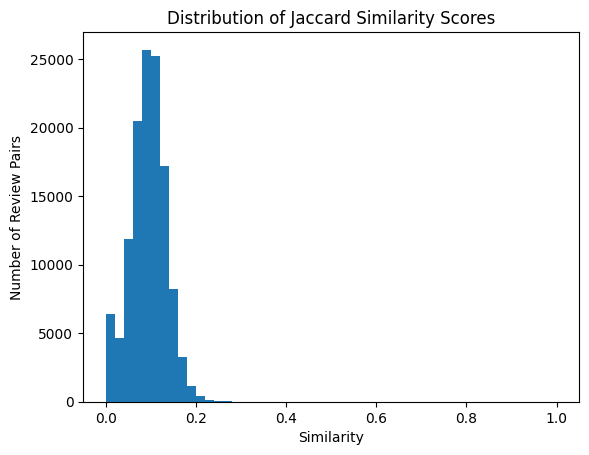

In [7]:
# Visualization
import matplotlib.pyplot as plt

similarities = [s for _, _, s in scores]
plt.hist(similarities, bins=50)
plt.title("Distribution of Jaccard Similarity Scores")
plt.xlabel("Similarity")
plt.ylabel("Number of Review Pairs")
plt.show()

## Declaration

“I declare that this material, which I now submit for assessment, is entirely my own work and has not been taken from the work of others, save and to the extent that such work has been cited and acknowledged within the text of my work. I understand that plagiarism, collusion, and copying are grave and serious offences in the university and accept the penalties that would be imposed should I engage in plagiarism, collusion or copying. This assignment, or any part of it, has not been previously submitted by me or any other person for assessment on this or any other course of study. No generative AI tool has been used to write the code or the report content.”